<a href="https://www.kaggle.com/code/shaikhabdulrafay03/multi-class-prediction-of-cirrhosis-outcomes?scriptVersionId=157298017" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/playground-series-s3e26/train.csv" , index_col= 'id')
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (7905, 19)
number of Columns:  19
number of Observations:  7905
Number of values in df:  150195
Total Number of Missing values in df:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in df :  0
percentage of Duplicated values :  0.00 %


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status       

In [5]:
df.nunique()

N_Days           461
Drug               2
Age              391
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        111
Cholesterol      226
Albumin          160
Copper           171
Alk_Phos         364
SGOT             206
Tryglicerides    154
Platelets        227
Prothrombin       49
Stage              4
Status             3
dtype: int64

In [6]:
df['Stage'] = df['Stage'].astype(object)

In [7]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462
std,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000


In [8]:
df.describe(include='O')

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Status
count,7905,7905,7905,7905,7905,7905,7905.0,7905
unique,2,2,2,2,2,3,4.0,3
top,Placebo,F,N,Y,N,N,3.0,C
freq,4010,7336,7525,4042,5966,7161,3153.0,4965


In [9]:

fig = make_subplots(rows=2, cols=4 ,subplot_titles=['Drug', 'Sex', 'Ascites', 'Status', 'Hepatomegaly', 'Spiders', 'Edema' , 'Stage'])

# Add histograms
fig.add_trace(go.Histogram(x=df['Drug']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Sex']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Ascites']), row=1, col=3)
fig.add_trace(go.Histogram(x=df['Hepatomegaly']), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Spiders']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['Edema']), row=2, col=3)
fig.add_trace(go.Histogram(x=df['Status']), row=1, col=4)
fig.add_trace(go.Histogram(x=df['Stage']), row=2, col=4)


# Show the plot
fig.show()

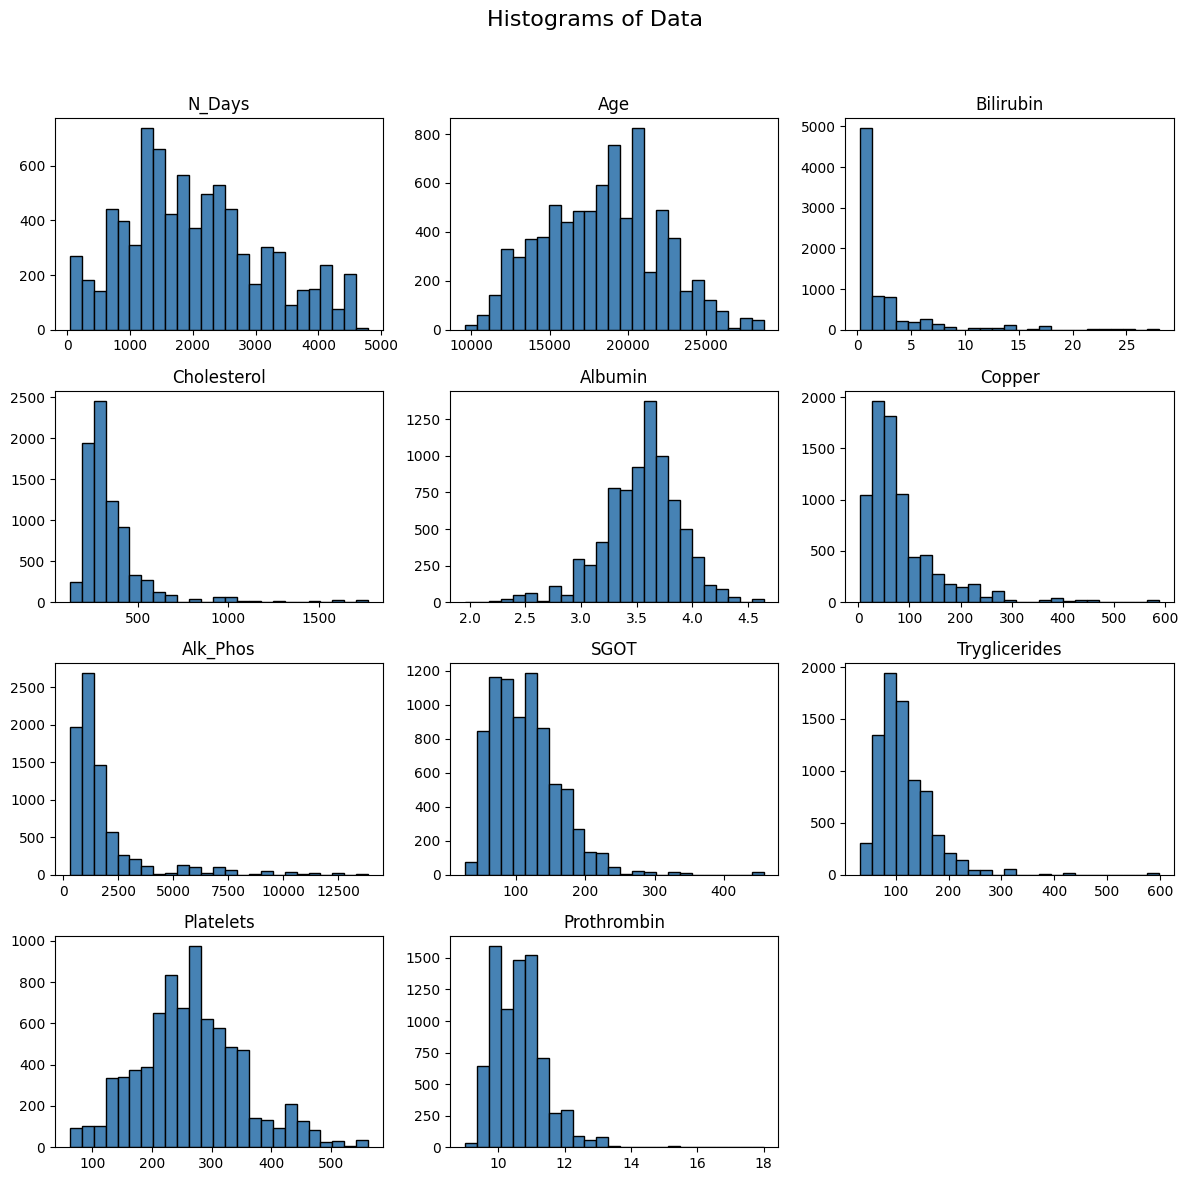

In [10]:
df.hist(bins = 25, color='steelblue', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [11]:
feature = ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin' , 'Stage']

In [12]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(contamination=0.1 , random_state=42)
IF.fit(df[feature])
df['anomaly_scores'] = IF.decision_function(df[feature])
df['anomaly'] = IF.predict(df[feature])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [13]:
df['anomaly'].value_counts()

anomaly
 1    7114
-1     791
Name: count, dtype: int64

palette = ['#ff7f0e' , '#1f77b4']
sns.pairplot(df , vars=feature ,hue= 'anomaly')

In [14]:
df.drop(df.loc[df['anomaly']==-1].index, inplace=True)
df.reset_index()
df.drop(['anomaly' , 'anomaly_scores' ], axis = 1 , inplace= True)
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D


In [15]:
df[['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin' , 'Stage']].skew()

N_Days           0.451848
Age              0.046905
Bilirubin        3.342701
Cholesterol       3.18826
Albumin         -0.405899
Copper           1.970269
Alk_Phos         3.410606
SGOT             1.100008
Tryglicerides     1.40875
Platelets        0.374875
Prothrombin      1.110013
Stage            -0.49754
dtype: object

In [16]:
for i in df.columns:
    if df[i].dtype != object :
        if df[i].skew() > 0.5: 
            df[i] = df[i].apply(lambda x: np.log(x))

In [17]:
df[['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin' , 'Stage']].skew()

N_Days           0.451848
Age              0.046905
Bilirubin        0.866579
Cholesterol      0.862478
Albumin         -0.405899
Copper          -0.234456
Alk_Phos         0.988535
SGOT            -0.045561
Tryglicerides    0.183187
Platelets        0.374875
Prothrombin       0.79187
Stage            -0.49754
dtype: object

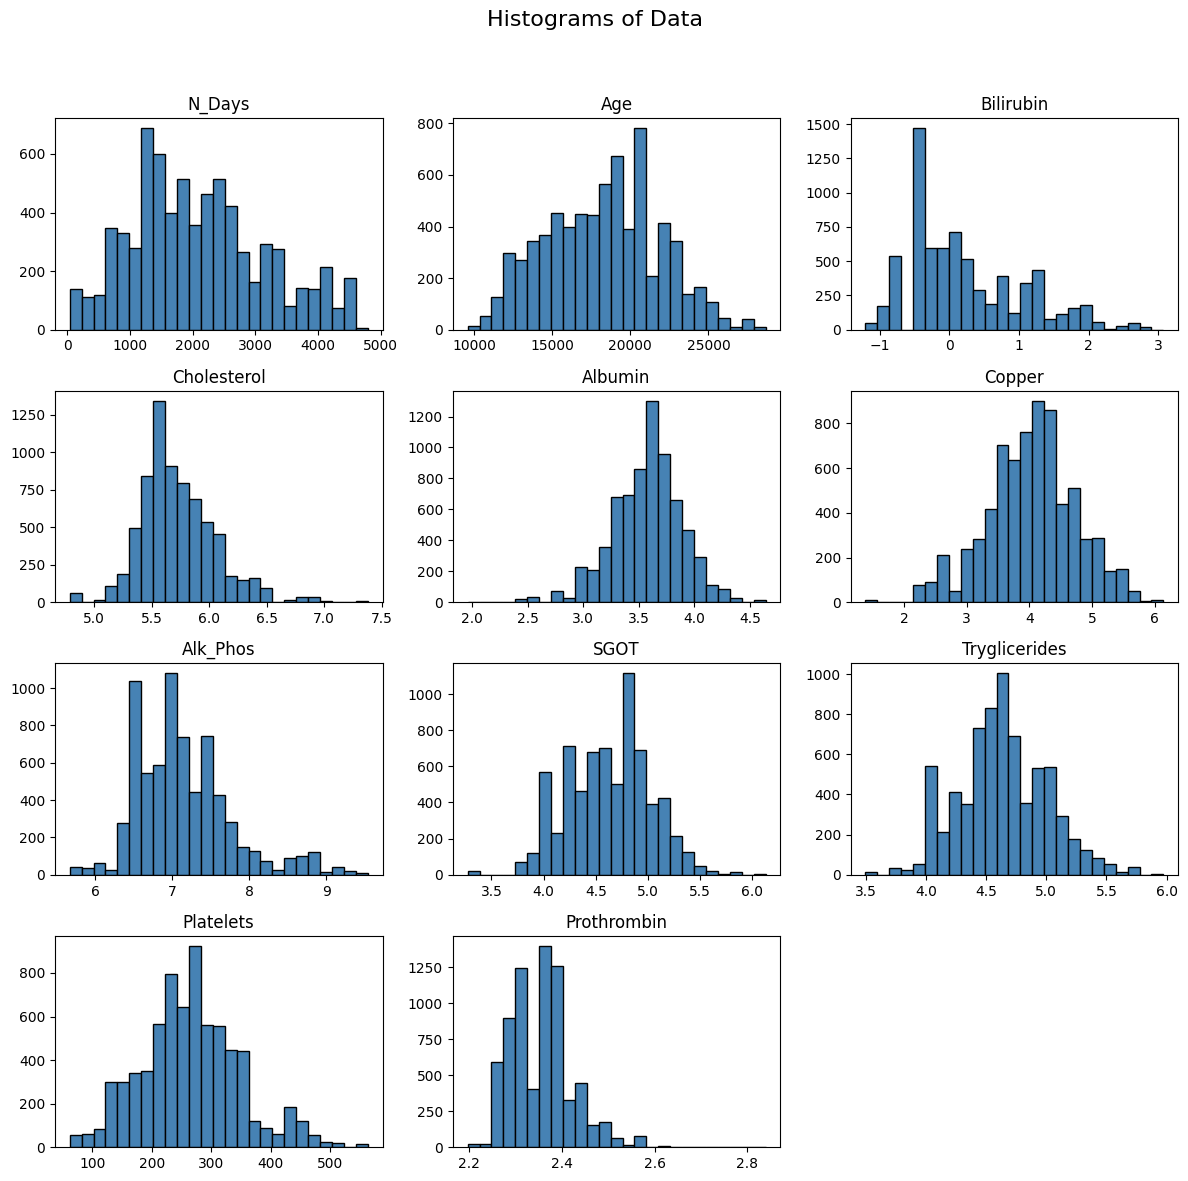

In [18]:
df.hist(bins = 25, color='steelblue', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

### Balancing Features

In [19]:
test = pd.read_csv(r"/kaggle/input/playground-series-s3e26/test.csv")
test

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
l = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema' , 'Stage' , 'Status']
for i in l:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    if i != 'Status':
        test[i] = le.transform(test[i])
    class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    if i == 'Status':
        print("Class Mapping:", class_mapping)
        

Class Mapping: {'C': 0, 'CL': 1, 'D': 2}


In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)),  # Adjust parameters as needed
    ('undersample', RandomUnderSampler(sampling_strategy='auto', random_state=42))  # Adjust parameters as needed
])

l = ['Sex', 'Ascites', 'Status', 'Spiders', 'Edema' , 'Stage']
for i in l :
    y = df.pop(i)
    x , y = pipeline.fit_resample(df, y)
    df = pd.concat([x , y] , axis=1)


In [22]:
class_distribution = df['Status'].value_counts()

desired_records_per_class = 5000

sampled_df = pd.DataFrame()

for class_label in class_distribution.index:
    class_subset = df[df['Status'] == class_label]
    
    sampled_class_subset = class_subset.sample(n=desired_records_per_class, random_state=42)
    
    sampled_df = pd.concat([sampled_df, sampled_class_subset])

sampled_df = sampled_df.sample(frac=1, random_state=42)

sampled_df.reset_index(drop=True, inplace=True)



In [23]:
fig = make_subplots(rows=2, cols=4 ,subplot_titles=['Drug', 'Sex', 'Ascites', 'Status', 'Hepatomegaly', 'Spiders', 'Edema' , 'Stage'])

# Add histograms
fig.add_trace(go.Histogram(x=sampled_df['Drug']), row=1, col=1)
fig.add_trace(go.Histogram(x=sampled_df['Sex']), row=1, col=2)
fig.add_trace(go.Histogram(x=sampled_df['Ascites']), row=1, col=3)
fig.add_trace(go.Histogram(x=sampled_df['Hepatomegaly']), row=2, col=1)
fig.add_trace(go.Histogram(x=sampled_df['Spiders']), row=2, col=2)
fig.add_trace(go.Histogram(x=sampled_df['Edema']), row=2, col=3)
fig.add_trace(go.Histogram(x=sampled_df['Status']), row=1, col=4)
fig.add_trace(go.Histogram(x=sampled_df['Stage']), row=2, col=4)


# Show the plot
fig.show()

### Feature Selection

In [24]:
correlation_matrix = df.corr()

correlations_with_Status = correlation_matrix['Status']
sorted_features_gpa = correlations_with_Status.abs().sort_values(ascending=False)
correlation_df = pd.DataFrame({
    'Feature': sorted_features_gpa.index,
    'Correlation with Target': sorted_features_gpa.values
})

correlation_df


,Feature,Correlation with Target
0,Status,1.000000
1,Ascites,0.671151
2,Edema,0.659432
3,Stage,0.622965
4,Prothrombin,0.564653
5,Hepatomegaly,0.555539
6,N_Days,0.520519
7,Bilirubin,0.511516
8,Platelets,0.483412
9,Albumin,0.473626


In [25]:
y = df.pop('Status')

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

kbest = SelectKBest(f_classif, k=12)
x = kbest.fit_transform(df, y)

print('Selected features:',  df.columns[kbest.get_support()].tolist())

Selected features: ['N_Days', 'Hepatomegaly', 'Bilirubin', 'Albumin', 'Copper', 'SGOT', 'Platelets', 'Prothrombin', 'Ascites', 'Spiders', 'Edema', 'Stage']


In [27]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x , y , train_size=0.8)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain , ytrain)
print('train score : '  , rf.score(xtrain , ytrain))
print('train score : '  , rf.score(xtest , ytest))

train score :  0.9999632449032932
train score :  0.9860984056455828


In [29]:
from sklearn.metrics import classification_report
preds = rf.predict(xtest)
print("Classification Report:\n", classification_report(ytest, preds))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     24438
           1       0.99      0.98      0.98     17113
           2       0.99      0.98      0.99     19665

    accuracy                           0.99     61216
   macro avg       0.99      0.98      0.99     61216
weighted avg       0.99      0.99      0.99     61216



In [30]:
test = test[ ['N_Days','Age','Bilirubin','Cholesterol','Albumin',
              'Copper','Alk_Phos','SGOT','Tryglicerides','Platelets',
              'Prothrombin' , 'Stage']]


In [31]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x,y)
probabilities = rf_classifier.predict_proba(test)
print("Predicted Probabilities:\n", probabilities[:5])



Predicted Probabilities:
 [[0.26 0.19 0.55]
 [0.31 0.24 0.45]
 [0.13 0.09 0.78]
 [0.36 0.19 0.45]
 [0.25 0.14 0.61]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [32]:
test = pd.read_csv(r'/kaggle/input/playground-series-s3e26/test.csv')

In [33]:
subb = pd.DataFrame({
    'id' : test['id'],
    'Status_C': probabilities[:, 0],
    'Status_CL': probabilities[:, 1],
    'Status_D': probabilities[:, 2]
}) 
subb.to_csv('submission.csv', index=False)
subb

,id,Status_C,Status_CL,Status_D
0,7905,0.26,0.19,0.55
1,7906,0.31,0.24,0.45
2,7907,0.13,0.09,0.78
3,7908,0.36,0.19,0.45
4,7909,0.25,0.14,0.61
...,...,...,...,...
5266,13171,0.17,0.24,0.59
5267,13172,0.21,0.18,0.61
5268,13173,0.10,0.13,0.77
5269,13174,0.24,0.14,0.62
